In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [3]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [4]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

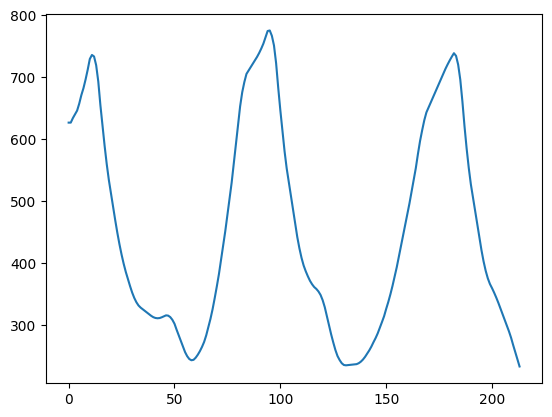

In [14]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [5]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

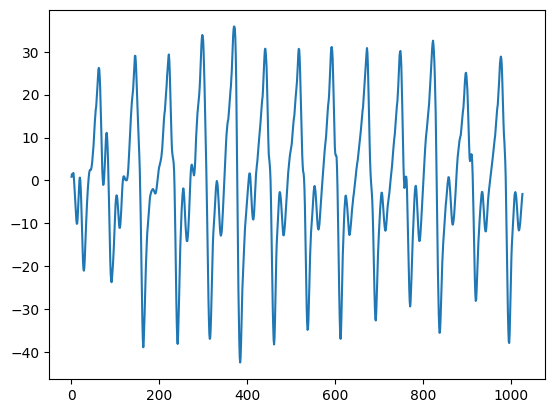

In [6]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [7]:
df_ball_positions['ball_hit']=0

In [ ]:
minimum_change_frames_for_hit = 25

# Initialize 'ball_hit' column with zeros if not already present
if 'ball_hit' not in df_ball_positions.columns:
    df_ball_positions['ball_hit'] = 0

for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit * 1.2)):
    negative_position_change = (
        df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i + 1] < 0
    )
    positive_position_change = (
        df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i + 1] > 0
    )

    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i + 1, i + int(minimum_change_frames_for_hit * 1.2) + 1):
            negative_position_change_following_frame = (
                df_ball_positions['delta_y'].iloc[i] > 0
                and df_ball_positions['delta_y'].iloc[change_frame] < 0
            )
            positive_position_change_following_frame = (
                df_ball_positions['delta_y'].iloc[i] < 0
                and df_ball_positions['delta_y'].iloc[change_frame] > 0
            )

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1

        if change_count > minimum_change_frames_for_hit - 1:
            # Use .loc[] for safe assignment
            df_ball_positions.loc[i, 'ball_hit'] = 1


import numpy as np

# Define the specific values for x1 and y1 to drop
x1_value = 1288.377650
y1_value = 647.037925

# Use np.isclose for floating-point comparison
df_ball_positions = df_ball_positions[
    ~((np.isclose(df_ball_positions['x1'], x1_value)) & (np.isclose(df_ball_positions['y1'], y1_value)))
]

# Verify the rows have been removed
print(df_ball_positions)

# Extract the frame numbers with ball hits
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()


In [16]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
6,821.674379,448.644084,841.780824,469.423747,459.033916,459.582143,1.078638,1
39,1157.409605,179.086236,1173.221617,195.247247,187.166742,185.597870,-0.582949,1
85,430.230580,620.375164,451.331411,641.549724,630.962444,638.792928,0.331437,1
117,1019.701407,278.860915,1035.169181,294.974379,286.917647,285.530860,-0.763077,1
126,1021.256762,281.267250,1036.724535,297.380714,289.323982,289.276139,-0.001870,1
156,733.087332,722.450602,752.568777,743.486613,732.968608,735.590399,2.544400,1
196,1122.878496,248.433301,1132.961504,258.818433,253.625867,252.319155,-0.326772,1
234,803.623363,726.366451,822.788402,746.319331,736.342891,738.147505,2.185863,1
270,714.210739,216.757394,727.812790,230.738961,223.748177,221.985037,-2.228529,1
307,1429.037080,756.730969,1449.784639,778.410046,767.570508,771.232406,3.153773,1


In [23]:
df_ball_positions[df_ball_positions['ball_hit']==1].shape

(28, 8)

In [21]:
import numpy as np

# Define the specific values for x1 and y1 to drop
x1_value = 1288.377650
y1_value = 647.037925

# Use np.isclose for floating-point comparison
df_ball_positions = df_ball_positions[
    ~((np.isclose(df_ball_positions['x1'], x1_value)) & (np.isclose(df_ball_positions['y1'], y1_value)))
]

# Verify the rows have been removed
print(df_ball_positions)


              x1          y1          x2          y2       mid_y  \
0     834.570985  440.883228  854.936707  463.024464  451.953846   
1     829.355733  442.967018  850.159199  464.314430  453.640724   
2     821.404992  445.964802  842.528039  468.283162  457.123982   
3     814.603892  448.565534  836.420542  471.762068  460.163801   
4     813.491829  450.181821  835.836678  471.781980  460.981900   
...          ...         ...         ...         ...         ...   
1021  653.223335  223.532545  666.691597  237.281935  230.407240   
1022  646.741692  218.726608  662.317131  234.176559  226.451584   
1023  642.552445  215.870711  657.371537  231.084945  223.477828   
1024  637.807310  212.507925  654.444273  230.121939  221.314932   
1025  634.843257  210.730114  651.471675  228.335949  219.533032   

      mid_y_rolling_mean   delta_y  ball_hit  
0             451.953846       NaN         0  
1             452.797285  0.843439         0  
2             454.239517  1.442232        

In [24]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()
